Installations

In [ ]:
# Install the scanpy library, which is essential for single-cell data analysis.
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 125.5 MB/s eta 0:00:00


In [ ]:
# Install the anndata library, a core dependency for handling annotated data matrices.
!pip install anndata

In [ ]:
# Install the igraph library, often used for graph-based algorithms like Leiden clustering.
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 23.7 MB/s eta 0:00:00


In [ ]:
# Install celltypist, a tool for automated cell type annotation.
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 40.8 MB/s eta 0:00:00


In [ ]:
# Install decoupler, a Python library for biological data analysis, including marker gene analysis.
!pip install decoupler

In [ ]:
# Install fa2-modified, likely a dependency for ForceAtlas2 algorithm used in some graph layouts.
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.8/620.8 kB 9.0 MB/s eta 0:00:00


Loading Data

In [ ]:
# Import the scanpy library as 'sc' for single-cell data analysis functions.
import scanpy as sc
# Import the anndata library as 'ad' for handling annotated data matrices.
import anndata as ad

In [ ]:
# Download the bone_marrow.h5ad dataset from a specified URL using wget.
# The -O flag saves the downloaded file with the specified filename.
!wget -O bone_marrow.h5ad https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad

--2025-11-23 10:31:17--  https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354509549 (338M) [application/octet-stream]
Saving to: ‘bone_marrow.h5ad’

bone_marrow.h5ad    100%[===================>] 338.09M  80.4MB/s    in 4.2s    

2025-11-23 10:31:22 (80.3 MB/s) - ‘bone_marrow.h5ad’ saved [354509549/354509549]



In [ ]:
# Read the downloaded h5ad file into an AnnData object, which is the standard data structure for scanpy.
bone_marrow_adata = sc.read('bone_marrow.h5ad')

In [ ]:
# Print the AnnData object to display a summary of its contents, including dimensions, observations (cells), and variables (genes).
print(bone_marrow_adata)

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [ ]:
# Display the shape of the AnnData object, which represents the number of observations (cells) and variables (genes).
bone_marrow_adata.shape   #dimensions of the dataset

(14783, 17374)

In [ ]:
#14783 cells
#17374 genes

In [ ]:
# Display the first few rows of the .var (variable/gene) DataFrame to inspect gene-specific metadata.
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [ ]:
# Display the first few rows of the .obs (observation/cell) DataFrame to inspect cell-specific metadata.
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [ ]:
# Convert the AnnData object's expression matrix to a pandas DataFrame and display its head.
bone_marrow_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Quality Control

In [ ]:
# Ensure that variable names (genes) are unique, which is a common requirement for many analysis functions.
bone_marrow_adata.var_names_make_unique()
# Ensure that observation names (cells) are unique.
bone_marrow_adata.obs_names_make_unique()

In [ ]:
# Identify mitochondrial genes by checking if their feature names start with 'MT-'.
bone_marrow_adata.var['MT'] = bone_marrow_adata.var['feature_name'].str.startswith('MT-')
# Identify ribosomal genes by checking if their feature names start with 'RPS' or 'RPL'.
bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var['feature_name'].str.startswith(('RPS', 'RPL'))
# Identify hemoglobin genes using a regular expression to match gene names starting with 'HB' but not 'HBP'.
bone_marrow_adata.var['HB'] = bone_marrow_adata.var['feature_name'].str.contains('^HB[^(P)]', regex=True)

In [ ]:
# Filter the variable DataFrame to show only genes identified as mitochondrial and display the result.
mt_genes = bone_marrow_adata.var[bone_marrow_adata.var['MT']]
mt_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
ENSG00000228253,2270,False,MT-ATP8,NCBITaxon:9606,gene,207,protein_coding,True,False,False
ENSG00000198899,15626,False,MT-ATP6,NCBITaxon:9606,gene,681,protein_coding,True,False,False
ENSG00000198763,15561,False,MT-ND2,NCBITaxon:9606,gene,1042,protein_coding,True,False,False
ENSG00000198886,15656,False,MT-ND4,NCBITaxon:9606,gene,1378,protein_coding,True,False,False
ENSG00000198804,15656,False,MT-CO1,NCBITaxon:9606,gene,1542,protein_coding,True,False,False
ENSG00000198695,4611,False,MT-ND6,NCBITaxon:9606,gene,525,protein_coding,True,False,False
ENSG00000212907,6575,False,MT-ND4L,NCBITaxon:9606,gene,297,protein_coding,True,False,False
ENSG00000198888,14520,False,MT-ND1,NCBITaxon:9606,gene,956,protein_coding,True,False,False
ENSG00000198712,15669,False,MT-CO2,NCBITaxon:9606,gene,684,protein_coding,True,False,False
ENSG00000198727,15393,False,MT-CYB,NCBITaxon:9606,gene,1141,protein_coding,True,False,False


In [ ]:
# Calculate quality control metrics for the AnnData object.
# This includes metrics related to mitochondrial, ribosomal, and hemoglobin gene counts.
# `inplace=True` modifies the AnnData object directly, and `log1p=True` applies log1p transformation to counts.
sc.pp.calculate_qc_metrics(
    bone_marrow_adata,
    qc_vars=["MT", 'RIBO', 'HB'],
    inplace=True,
    log1p=True
)

In [ ]:
# Display the first few rows of the .obs DataFrame after calculating QC metrics to see the new columns.
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,138.356339,4.937034,1.154665,879.968079,6.781022,7.343850,0.000000,0.000000,0.000000
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,113.859787,4.743712,1.350507,914.212402,6.819156,10.843602,0.000000,0.000000,0.000000
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,125.068520,4.836825,1.543431,952.813843,6.860468,11.758374,18.301193,2.960167,0.225849
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,103.474380,4.648942,1.182754,924.013672,6.829809,10.561848,0.000000,0.000000,0.000000
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,138.531082,4.938287,2.870118,850.272156,6.746732,17.616129,0.000000,0.000000,0.000000


In [ ]:
# Display the first few rows of the .var DataFrame after calculating QC metrics to see the new columns.
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


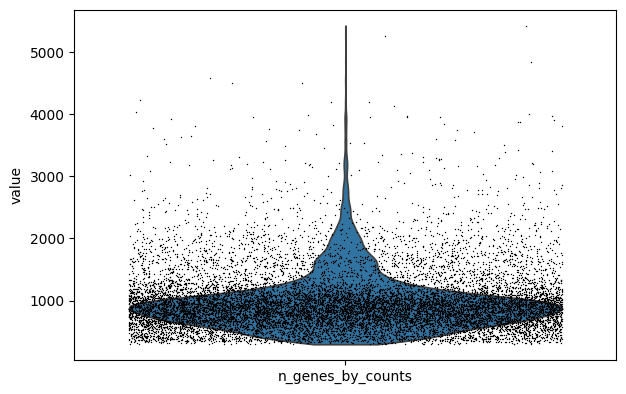

In [ ]:
# Create a violin plot to visualize the distribution of 'n_genes_by_counts' (number of genes expressed per cell).
# `jitter=0.4` adds random noise to points to prevent overplotting, `multi_panel=False` ensures a single plot.
sc.pl.violin(
    bone_marrow_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

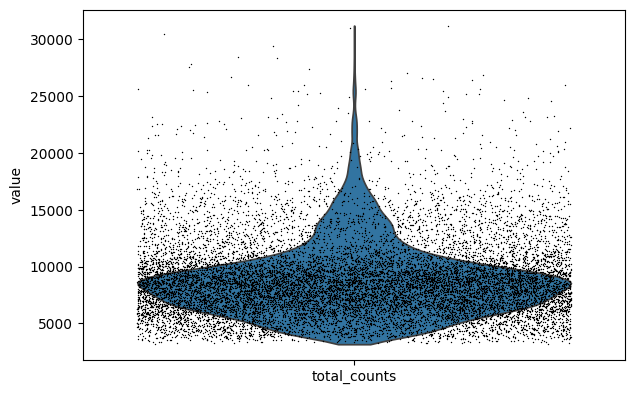

In [ ]:
# Create a violin plot to visualize the distribution of 'total_counts' (total number of UMIs per cell).
sc.pl.violin(
    bone_marrow_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

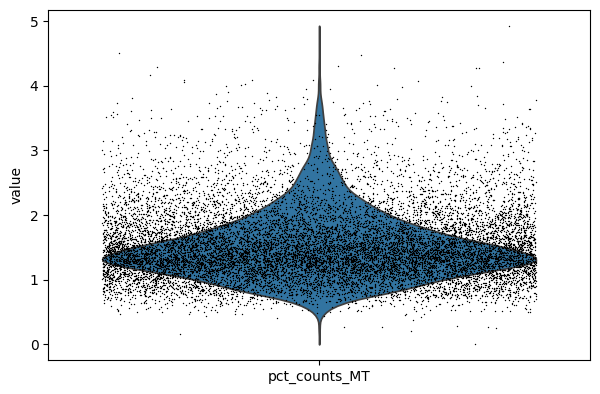

In [ ]:
# Create a violin plot to visualize the distribution of 'pct_counts_MT' (percentage of counts mapping to mitochondrial genes).
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_MT"],
    jitter=0.4,
    multi_panel=False,
)

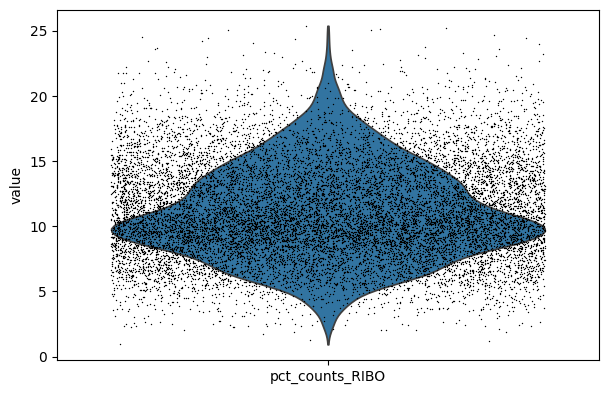

In [ ]:
# Create a violin plot to visualize the distribution of 'pct_counts_RIBO' (percentage of counts mapping to ribosomal genes).
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_RIBO"],
    jitter=0.4,
    multi_panel=False,
)

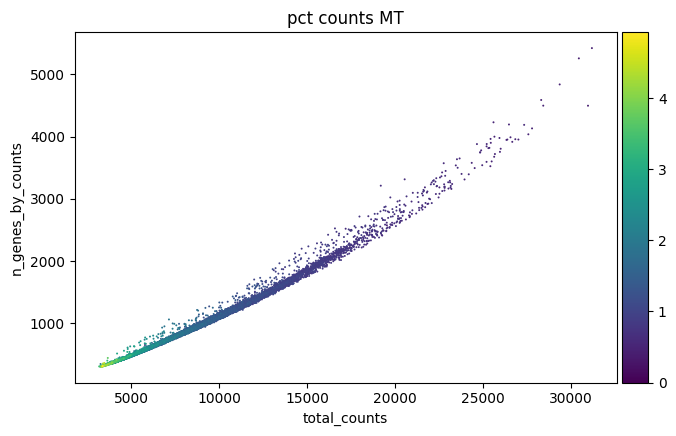

In [ ]:
# Create a scatter plot to visualize the relationship between 'total_counts' and 'n_genes_by_counts',
# colored by 'pct_counts_MT' to identify cells with high mitochondrial content.
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

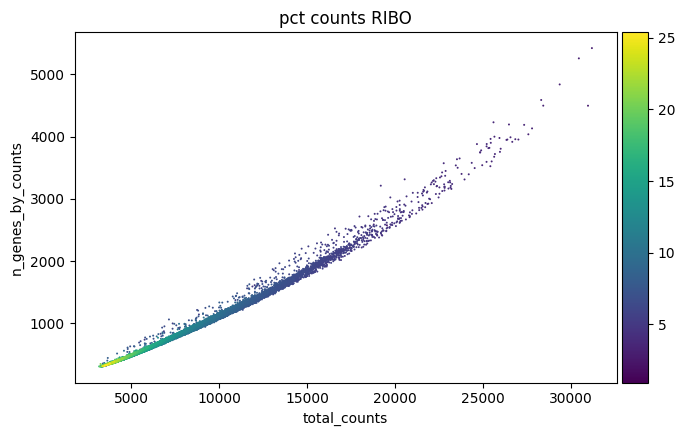

In [ ]:
# Create a scatter plot to visualize the relationship between 'total_counts' and 'n_genes_by_counts',
# colored by 'pct_counts_RIBO' to identify cells with high ribosomal content.
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

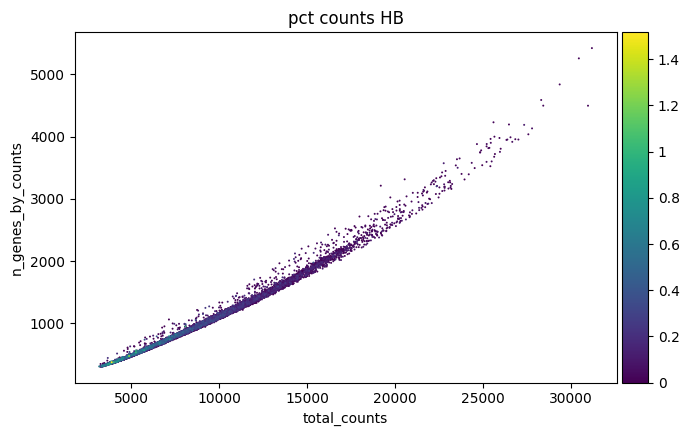

In [ ]:
# Create a scatter plot to visualize the relationship between 'total_counts' and 'n_genes_by_counts',
# colored by 'pct_counts_HB' to identify cells with high hemoglobin content.
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

In [ ]:
# Filter out cells that express fewer than 1000 genes.
sc.pp.filter_cells(bone_marrow_adata, min_genes=1000)
# Filter out genes that are expressed in fewer than 1000 cells.
sc.pp.filter_genes(bone_marrow_adata, min_cells=1000)

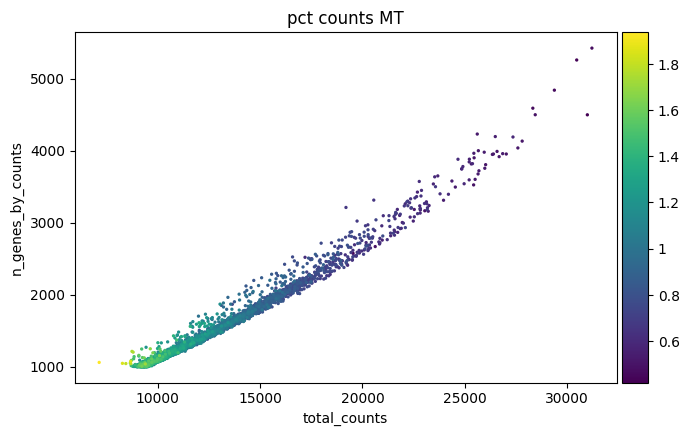

In [ ]:
# Re-create the scatter plot after filtering, visualizing 'total_counts' vs. 'n_genes_by_counts',
# colored by 'pct_counts_MT' to assess the effect of filtering.
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

In [ ]:
# Filter out cells that have a percentage of ribosomal counts greater than or equal to 10%.
bone_marrow_adata = bone_marrow_adata[
    bone_marrow_adata.obs['pct_counts_RIBO'] < 10,
    :
]

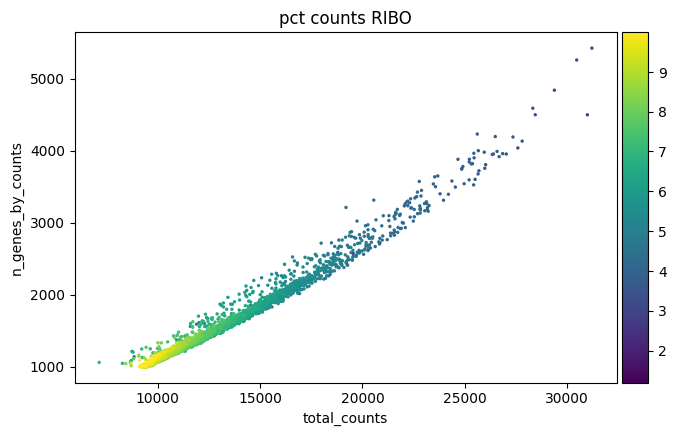

In [ ]:
# Re-create the scatter plot after filtering, visualizing 'total_counts' vs. 'n_genes_by_counts',
# colored by 'pct_counts_RIBO' to assess the effect of ribosomal gene filtering.
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

In [ ]:
# Run Scrublet to detect potential doublets (cells that are actually two or more cells).
# This adds 'doublet_score' and 'predicted_doublet' to adata.obs.
sc.pp.scrublet(bone_marrow_adata)

Normalization

In [ ]:
# Store a copy of the raw count data in a new layer named 'counts' for later use.
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()

In [ ]:
# Normalize the total counts per cell to the median total counts across all cells.
sc.pp.normalize_total(bone_marrow_adata)
# Apply a log1p transformation to the data (log(x+1)), which is common for count data to stabilize variance.
sc.pp.log1p(bone_marrow_adata)

In [ ]:
# Identify highly variable genes, which are genes that show high cell-to-cell variation beyond what's expected by chance.
# `n_top_genes=1000` selects the top 1000 most variable genes.
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=1000)

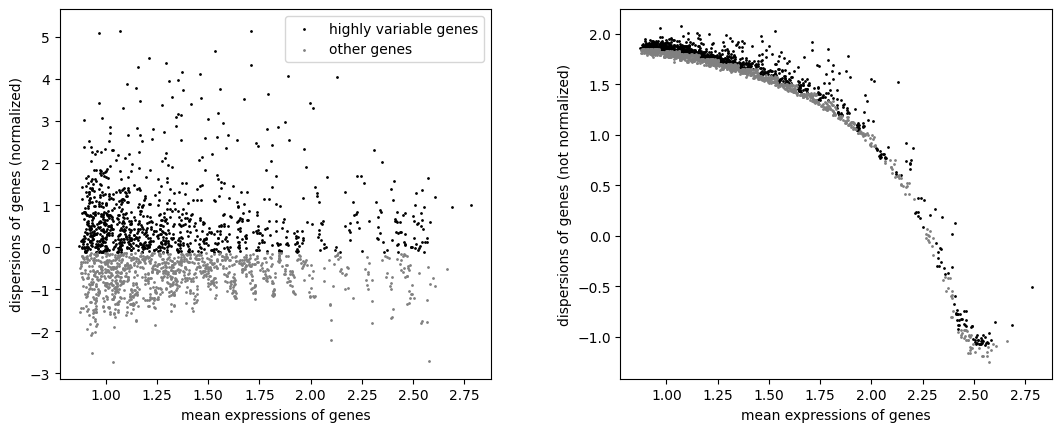

In [ ]:
# Plot the highly variable genes. This visualization typically shows genes based on their mean expression and variance.
sc.pl.highly_variable_genes(bone_marrow_adata)

Dimensionality Reduction

In [ ]:
# Perform Principal Component Analysis (PCA) to reduce the dimensionality of the data.
# This projects the high-dimensional gene expression data into a lower-dimensional space.
sc.tl.pca(bone_marrow_adata)

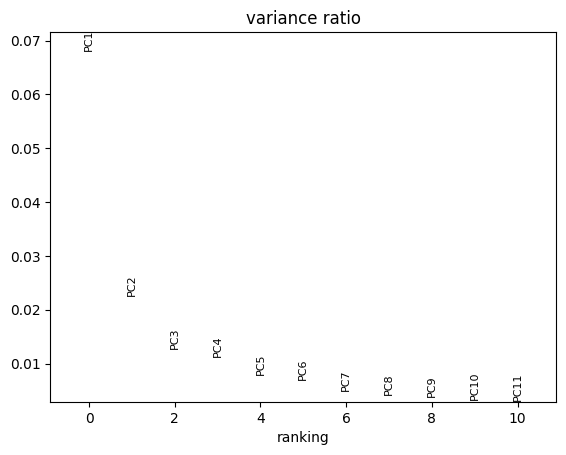

In [ ]:
# Plot the variance ratio explained by each principal component (PC).
# `n_pcs=10` shows the top 10 PCs, and `log=False` uses a linear scale for the variance.
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log=False)

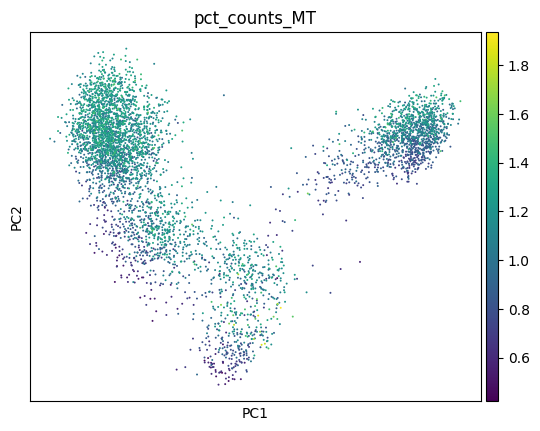

In [ ]:
# Plot the PCA embedding, coloring cells by their 'pct_counts_MT' to see if mitochondrial content correlates with PCA components.
sc.pl.pca(
    bone_marrow_adata,
    color=["pct_counts_MT"],
    size=8
)

In [ ]:
# Compute a neighborhood graph of cells based on the PCA space.
# This step is crucial for subsequent UMAP visualization and clustering.
sc.pp.neighbors(bone_marrow_adata)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ed8059ff420>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.12/dist-packages/scipy.libs/libscipy_openblas-b75cc656.

In [ ]:
# Perform Uniform Manifold Approximation and Projection (UMAP) for non-linear dimensionality reduction.
# UMAP helps to visualize high-dimensional data in 2D or 3D while preserving local and global data structure.
sc.tl.umap(bone_marrow_adata)

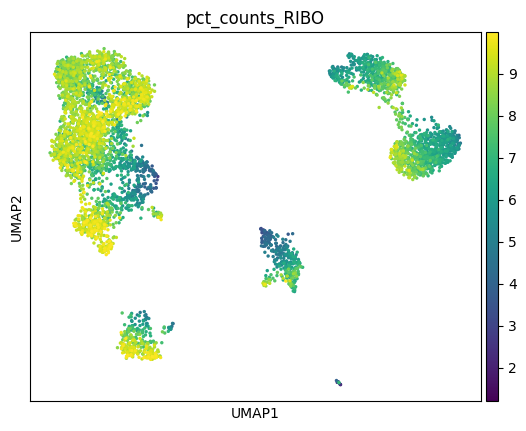

In [ ]:
# Plot the UMAP embedding, coloring cells by 'pct_counts_RIBO' to visualize ribosomal gene content distribution in the UMAP space.
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"],
)

In [ ]:
# Perform Leiden clustering, a community detection algorithm, on the neighborhood graph.
# `flavor="igraph"` uses the igraph implementation, `n_iterations=2` specifies the number of iterations.
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2)

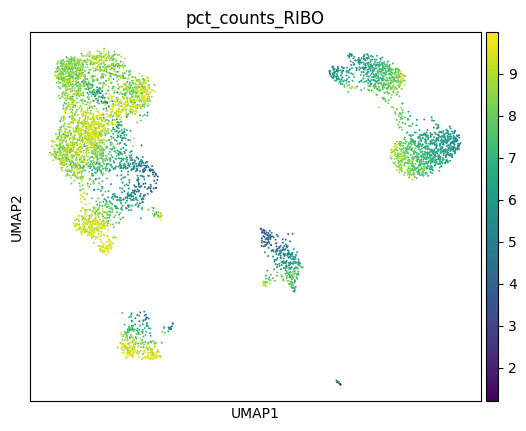

In [ ]:
# Plot the UMAP embedding, coloring cells by 'pct_counts_RIBO' to visualize ribosomal gene content distribution after clustering.
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

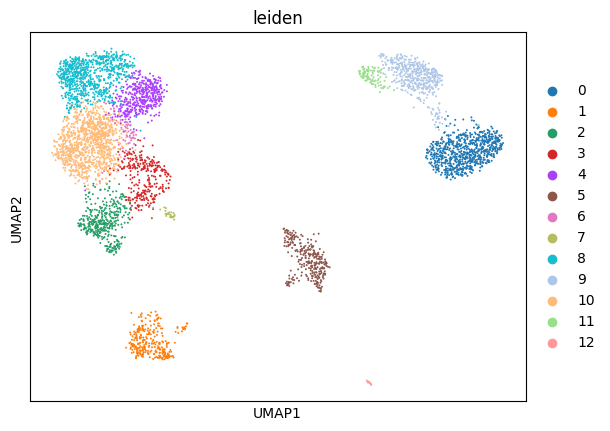

In [ ]:
# Plot the UMAP embedding, coloring cells by the 'leiden' clusters to visualize the cell groupings.
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    size=8,
)

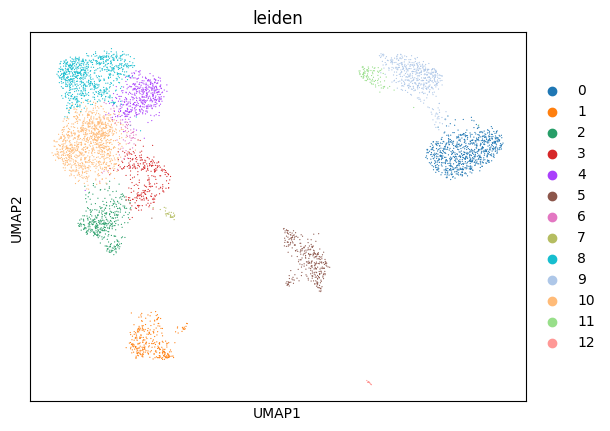

In [ ]:
# Plot the UMAP embedding, coloring cells by 'leiden' clusters with customized visualization parameters.
# `wspace=0.5` increases horizontal space, `size=3` adjusts marker size, `ncols=1` sets one column for plots.
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

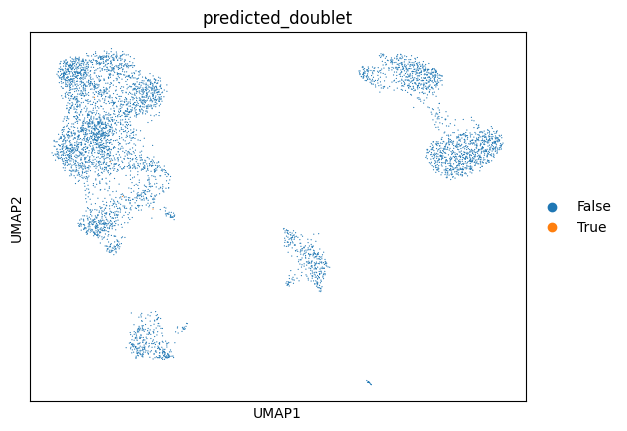

In [ ]:
# Plot the UMAP embedding, coloring cells by 'predicted_doublet' to visualize the distribution of predicted doublets.
sc.pl.umap(
    bone_marrow_adata,
    color=[ "predicted_doublet"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

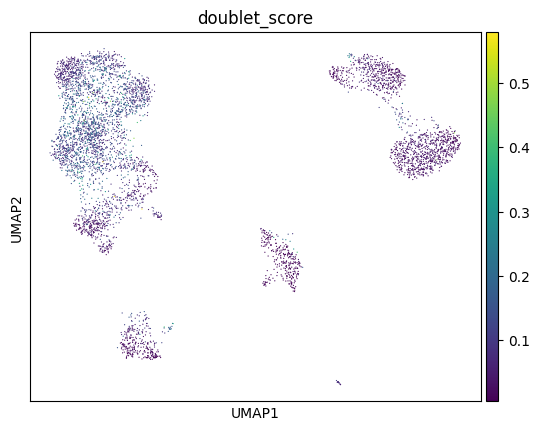

In [ ]:
# Plot the UMAP embedding, coloring cells by 'doublet_score' to visualize the distribution of doublet scores.
sc.pl.umap(
    bone_marrow_adata,
    color=[ "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

In [ ]:
# Perform Leiden clustering with different resolution parameters to explore varying granularities of cell clusters.
# `resolution=0.02`, `resolution=0.5`, and `resolution=2` are used to generate different clusterings.
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

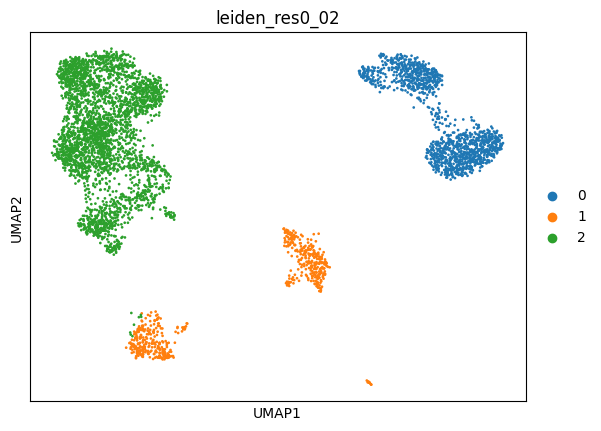

In [ ]:
# Plot the UMAP embedding, coloring cells by the 'leiden_res0_02' clusters (low resolution).
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_02"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

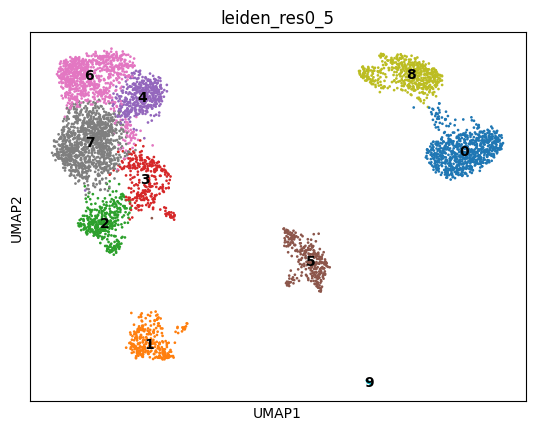

In [ ]:
# Plot the UMAP embedding, coloring cells by the 'leiden_res0_5' clusters (medium resolution).
# `legend_loc="on data"` places the legend directly on the plot.
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

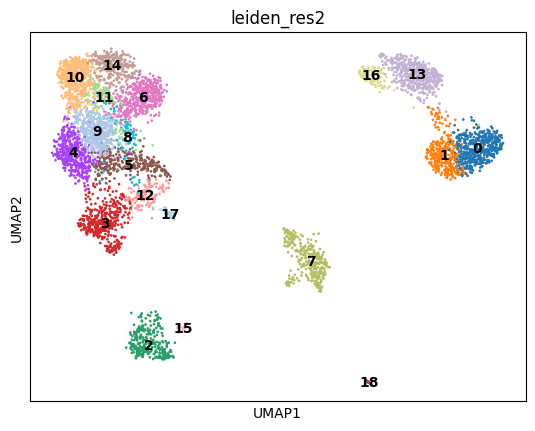

In [ ]:
# Plot the UMAP embedding, coloring cells by the 'leiden_res2' clusters (high resolution).
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res2"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

Cell Annotation

In [ ]:
# Import the decoupler library as 'dc' for cell annotation and analysis.
import decoupler as dc

In [ ]:
# Query the Omnipath database via decoupler to get human cell type markers from PanglaoDB.
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep only canonical cell type markers (highly specific and well-established markers).
markers = markers[markers["canonical_marker"]]

# Remove any duplicated entries based on cell type and gene symbol to ensure unique marker assignments.
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Rename columns to 'source' and 'target' to match decoupler's expected format for network analysis.
markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]

# Display the first few rows of the processed marker DataFrame.
markers.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [ ]:
# Store the original variable names (gene IDs) in a new column to preserve them.
bone_marrow_adata.var['original_var_names'] = bone_marrow_adata.var_names
# Change the AnnData object's variable names to gene symbols for easier interpretation and matching with marker databases.
bone_marrow_adata.var_names = bone_marrow_adata.var['feature_name'].astype(str)

# Run the Universal Regulatory Module (ULM) inference method from decoupler.
# This function uses the marker gene network to infer cell type activities in each cell.
dc.mt.ulm(data=bone_marrow_adata,
          net=markers,
          tmin = 3)

In [ ]:
# Retrieve the ULM scores (cell type activities) from the 'obsm' attribute of the AnnData object.
# These scores indicate the predicted activity of each cell type in every single cell.
score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 4973 × 50
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pc

In [ ]:
# Display the first few rows of the 'score_ulm' DataFrame, which contains the inferred cell type scores for each cell.
bone_marrow_adata.obsm["score_ulm"].head()

,Adipocytes,Astrocytes,B cells,B cells memory,B cells naive,Basophils,Bergmann glia,Cardiomyocytes,Chondrocytes,Dendritic cells,...,Platelets,Podocytes,Pulmonary alveolar type II cells,Satellite glial cells,Sebocytes,Sertoli cells,T cells,T helper cells,Thymocytes,Tuft cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,1.460486,0.297164,-0.000944,-0.419695,0.129301,0.865704,0.456024,0.867438,1.573940,3.716826,...,0.963949,-1.429216,0.811600,0.955586,0.918002,0.897595,-3.588958,-0.308526,-2.338670,1.249212
Guo-AAACCTGCACACCGCA-4,-1.411221,0.287771,2.973918,3.079957,4.090113,-0.029775,-0.344925,1.185906,-1.213173,1.886221,...,-0.623700,-1.221709,-1.221709,-1.221709,-1.221709,0.008912,-1.301395,1.185906,0.921848,0.091880
Guo-AAACCTGCATCCAACA-3,-0.341367,0.388294,-1.212666,0.146668,-0.421956,0.694361,-0.255607,0.002653,-1.214992,-1.304738,...,-0.123724,0.082622,-1.190576,-1.190576,-1.190576,-1.190576,2.571612,0.127314,0.279934,0.060342
Guo-AAACCTGGTTCAGGCC-4,1.172030,-0.184741,-0.434708,0.721980,0.505005,-2.077872,0.342971,0.633060,-0.535613,0.999590,...,1.174846,-0.464823,-1.563521,-1.563521,-0.464823,-1.563521,2.122239,-0.464823,-0.535613,-0.476626
Guo-AAACCTGTCAAGGTAA-2,0.385063,-0.099053,1.521933,0.834287,0.555401,-1.154429,0.412688,0.876479,-0.265659,0.084835,...,0.783954,-1.463581,-1.463581,-0.281040,-0.334396,-1.463581,1.671383,0.876479,-0.203195,0.441716


In [ ]:
# Display the column names of the 'score_ulm' DataFrame, which correspond to the identified cell types.
bone_marrow_adata.obsm["score_ulm"].columns

Index(['Adipocytes', 'Astrocytes', 'B cells', 'B cells memory',
       'B cells naive', 'Basophils', 'Bergmann glia', 'Cardiomyocytes',
       'Chondrocytes', 'Dendritic cells', 'Embryonic stem cells',
       'Endothelial cells', 'Eosinophils', 'Erythroblasts',
       'Erythroid-like and erythroid precursor cells', 'Fibroblasts',
       'Gamma delta T cells', 'Germ cells', 'Hematopoietic stem cells',
       'Hepatocytes', 'Keratinocytes', 'Kupffer cells',
       'Luminal epithelial cells', 'Macrophages', 'Mast cells',
       'Megakaryocytes', 'Mesangial cells', 'Microfold cells', 'Microglia',
       'Monocytes', 'Müller cells', 'NK cells', 'Natural killer T cells',
       'Neurons', 'Neutrophils', 'Osteoclasts', 'Pancreatic progenitor cells',
       'Paneth cells', 'Plasma cells', 'Plasmacytoid dendritic cells',
       'Platelets', 'Podocytes', 'Pulmonary alveolar type II cells',
       'Satellite glial cells', 'Sebocytes', 'Sertoli cells', 'T cells',
       'T helper cells', 'Thymocyt

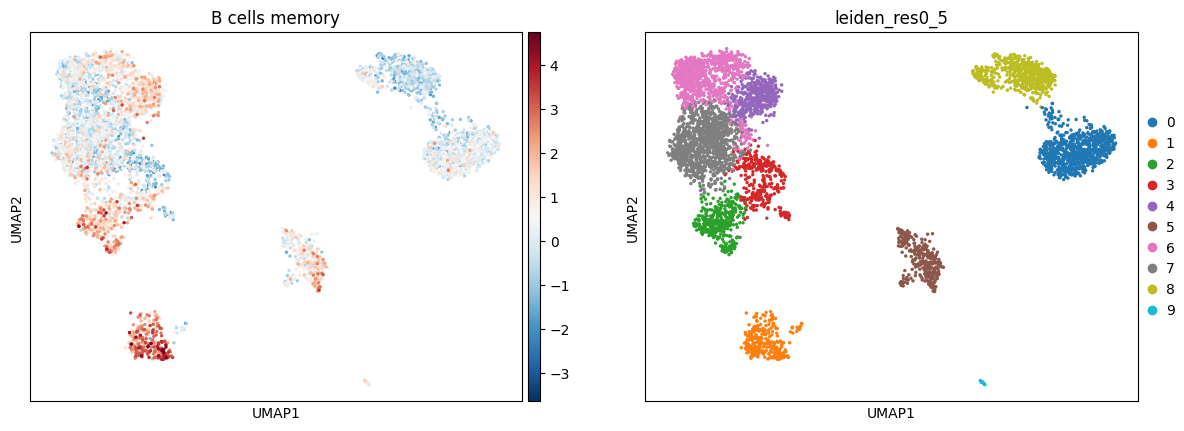

In [ ]:
# Plot the UMAP embedding, coloring cells by 'B cells memory' scores and 'leiden_res0_5' clusters.
# The 'RdBu_r' colormap is used to highlight positive and negative scores.
sc.pl.umap(score, color=["B cells memory", "leiden_res0_5"], cmap="RdBu_r")

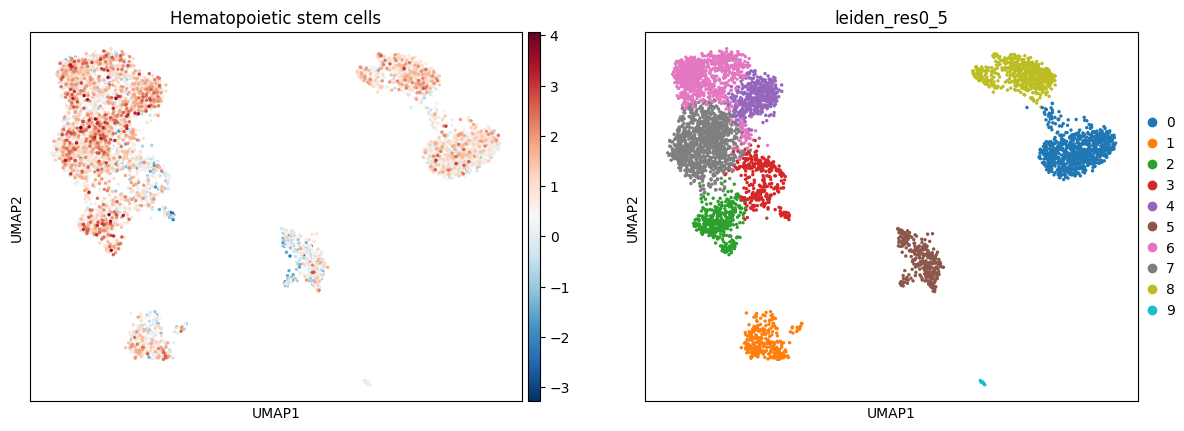

In [ ]:
# Plot the UMAP embedding, coloring cells by 'Hematopoietic stem cells' scores and 'leiden_res0_5' clusters.
sc.pl.umap(score, color=["Hematopoietic stem cells", "leiden_res0_5"], cmap="RdBu_r")

In [ ]:
# Import the seaborn library, commonly used for statistical data visualization.
import seaborn as sns

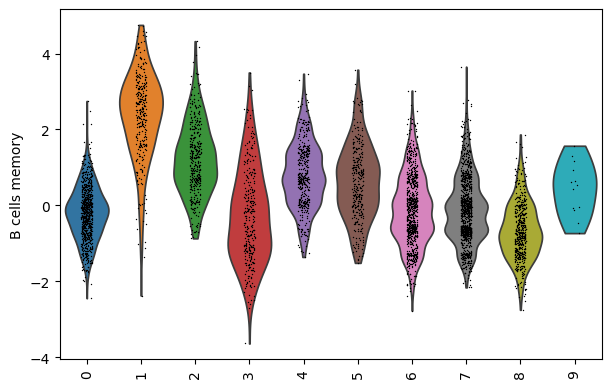

In [ ]:
# Create a violin plot to show the distribution of 'B cells memory' scores across different 'leiden_res0_5' clusters.
# `rotation=90` rotates the x-axis labels for better readability.
sc.pl.violin(score, keys=["B cells memory"], groupby="leiden_res0_5", rotation=90)

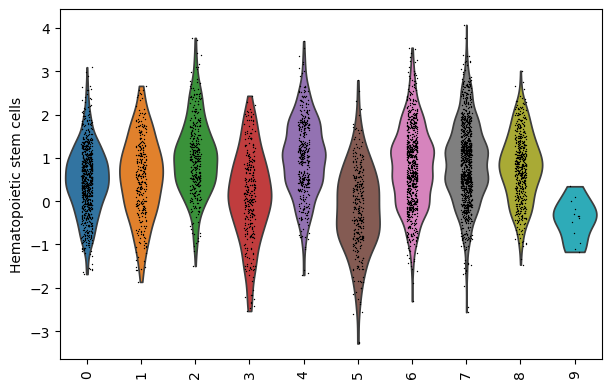

In [ ]:
# Create a violin plot to show the distribution of 'Hematopoietic stem cells' scores across different 'leiden_res0_5' clusters.
sc.pl.violin(score, keys=["Hematopoietic stem cells"], groupby="leiden_res0_5", rotation=90)

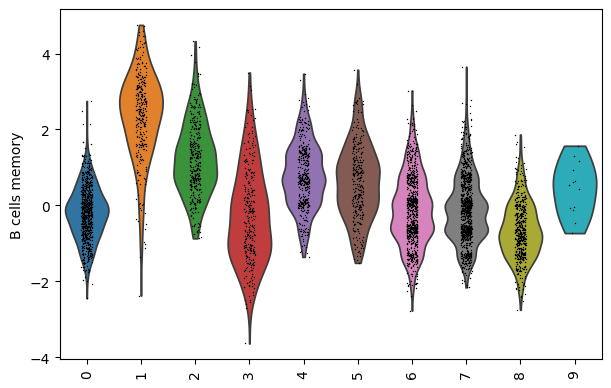

In [ ]:
# Create another violin plot for 'B cells memory' scores grouped by 'leiden_res0_5' clusters.
sc.pl.violin(score, keys=["B cells memory"], groupby="leiden_res0_5", rotation=90)

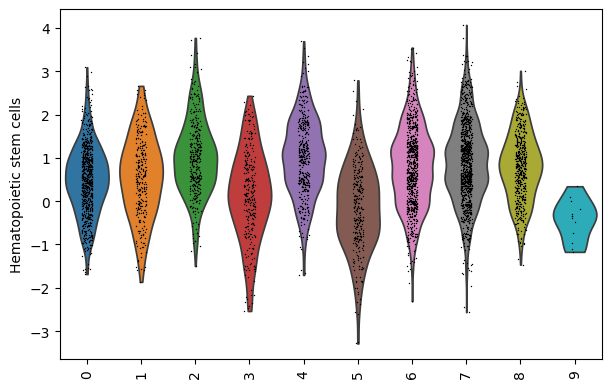

In [ ]:
# Create another violin plot for 'Hematopoietic stem cells' scores grouped by 'leiden_res0_5' clusters.
sc.pl.violin(score, keys=["Hematopoietic stem cells"], groupby="leiden_res0_5", rotation=90)

In [ ]:
# Rank genes by their activity score within each 'leiden_res0_5' cluster compared to the rest of the cells.
# `method="t-test_overestim_var"` uses a t-test with overestimated variance for differential testing.
bone_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_5", reference="rest", method="t-test_overestim_var")
# Filter for genes with a positive 'stat' value, indicating higher expression in the current group.
bone_marrow_adata_rank = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0]
# Display the first few rows of the ranked genes DataFrame.
bone_marrow_adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,53.428235,2.857285,0.000000e+00,0.000000e+00
1,0,rest,Dendritic cells,52.650983,3.183890,9.227416e-305,2.306854e-303
2,0,rest,Microglia,47.593059,2.320435,1.384267e-279,2.307111e-278
3,0,rest,Monocytes,43.602542,2.517625,3.332312e-246,4.165390e-245
4,0,rest,Satellite glial cells,36.412120,1.464522,2.699882e-211,2.699882e-210


In [ ]:
# Create a dictionary `cluster_annotations` by mapping each 'leiden_res0_5' cluster to its top-ranked cell type name.
# `groupby("group").head(1)` selects the top cell type for each cluster.
cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()

/tmp/ipython-input-2057619800.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [ ]:
# Display the generated cluster annotations dictionary.
cluster_annotations

{'0': 'Neutrophils',
 '1': 'B cells naive',
 '2': 'T cells',
 '4': 'Plasma cells',
 '5': 'Plasma cells',
 '6': 'Gamma delta T cells',
 '3': 'T cells',
 '8': 'Dendritic cells',
 '7': 'T cells',
 '9': 'Platelets'}

In [ ]:
# Map the `cluster_annotations` to the 'leiden_res0_5' column in `bone_marrow_adata.obs` to assign a cell type label to each cell.
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['leiden_res0_5'].map(cluster_annotations)

In [ ]:
# Get the set of all available gene names in the dataset.
available_genes = set(bone_marrow_adata.var_names)

# Filter for B cell memory markers from the `markers` DataFrame and check if they are present in the dataset.
b_cell_markers = markers[markers['source'].isin(['B cells memory'])]['target']
b_cell_markers = b_cell_markers[b_cell_markers.isin(available_genes)]

# Filter for Natural Killer T cell markers and check if they are present in the dataset.
nk_cell_markers = markers[markers['source'].isin(['Natural killer T cells'])]['target']
nk_cell_markers = nk_cell_markers[nk_cell_markers.isin(available_genes)]

# Filter for T cell markers and check if they are present in the dataset.
t_cells_markers = markers[markers['source'].isin(['T cells'])]['target']
t_cells_markers = t_cells_markers[t_cells_markers.isin(available_genes)]

# Display the selected B cell memory markers.
display(b_cell_markers)

,target
,
1105,CD27
1140,CD37
1228,CD69
1253,CD79B
3588,IGHM
3594,IGKC
4385,LTB
6042,PTPRC
6248,RASGRP2


Other Visualizations

In [ ]:
# Create a dictionary of marker genes for different cell types.
# This dictionary will be used for visualization functions like dotplot, violin plot, etc.
marker_genes_dict = {
    "B cells": b_cell_markers.head().tolist(),
    "NK cells": nk_cell_markers.head().tolist(),
    "T cells": t_cells_markers.head().tolist()

}

categories: B cells naive, Dendritic cells, Gamma delta T cells, etc.
var_group_labels: B cells, NK cells, T cells


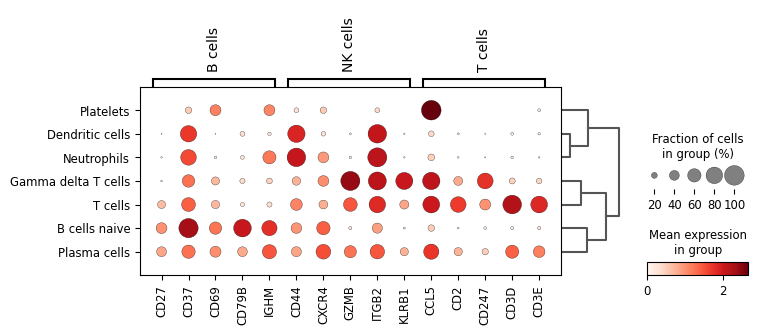

In [ ]:
# Convert 'cell_type' to a categorical data type for proper grouping in scanpy functions.
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['cell_type'].astype('category')

# Compute a hierarchical clustering of the 'cell_type' groups to create a dendrogram.
sc.tl.dendrogram(bone_marrow_adata, groupby='cell_type')
# Generate a dot plot to visualize the expression of marker genes across different cell types.
# `dendrogram=True` orders groups according to the dendrogram, `use_raw=False` uses processed data.
sc.pl.dotplot(bone_marrow_adata, marker_genes_dict, "cell_type", dendrogram=True, use_raw=False)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


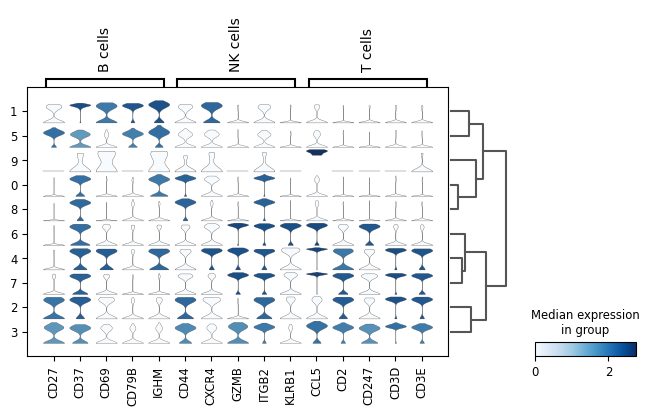

In [ ]:
# Generate a stacked violin plot to visualize the expression distribution of marker genes within each 'leiden_res0_5' cluster.
# `dendrogram=True` orders the clusters based on their similarity.
sc.pl.stacked_violin(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5",  dendrogram=True, use_raw=False
)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


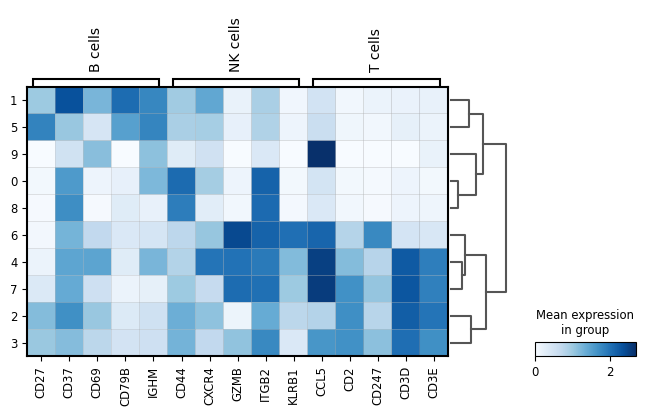

In [ ]:
# Generate a matrix plot to visualize the average expression of marker genes across 'leiden_res0_5' clusters.
# `cmap="Blues"` sets the colormap, `dendrogram=True` orders the clusters.
sc.pl.matrixplot(
    bone_marrow_adata,
    marker_genes_dict,
    "leiden_res0_5",
    dendrogram=True,
    cmap="Blues",
    use_raw=False,
)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


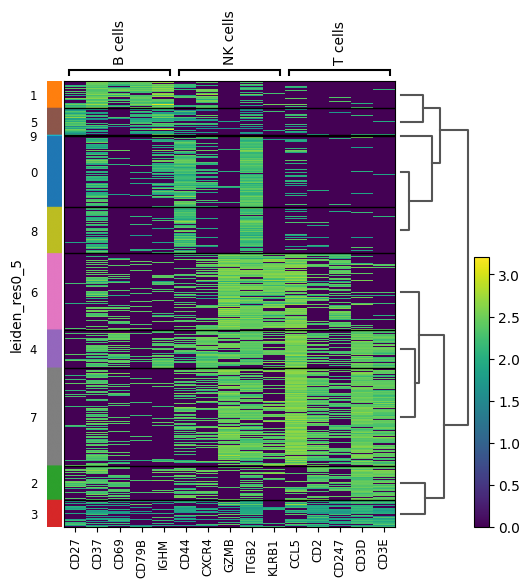

In [ ]:
# Generate a heatmap to visualize the expression of marker genes grouped by 'leiden_res0_5' clusters.
# `cmap="viridis"` sets the colormap, `dendrogram=True` orders the clusters.
sc.pl.heatmap(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5", cmap="viridis", dendrogram=True, use_raw=False
)

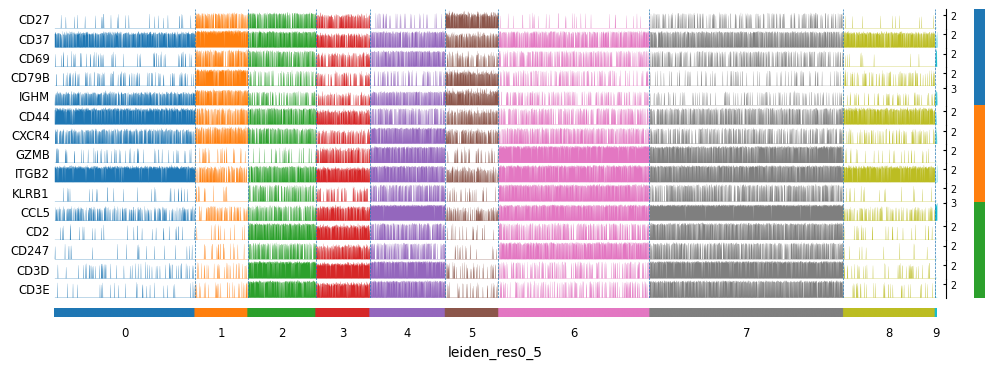

In [ ]:
# Generate a tracksplot to visualize marker gene expression across 'leiden_res0_5' clusters.
# `dendrogram=False` means clusters are not reordered based on similarity.
sc.pl.tracksplot(bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5", dendrogram=False, use_raw=False)

# **Discussion: Interpreting Cell Types and Biological Context in a Single-Cell Dataset**

# **1. What cell types were identified?**


The cell types that were annotated to the clusters in the `bone_marrow_adata` object were retrieved and displayed.

**Reasoning**:
To display the unique cell types identified,the 'cell_type' column in `bone_marrow_adata.obs` was accessed and its unique values were extracted.


In [ ]:
# Extract unique cell types identified in the 'cell_type' column of the AnnData object's observations.
identified_cell_types = bone_marrow_adata.obs['cell_type'].unique()
# Print a header for the identified cell types.
print("Identified Cell Types:")
# Iterate through each unique cell type and print it.
for cell_type in identified_cell_types:
    print(cell_type)

Identified Cell Types:
Neutrophils
B cells naive
T cells
Plasma cells
Gamma delta T cells
Dendritic cells
Platelets


# **2. Explain the biological role of each cell type**

A concise biological role description for each of the identified cell types (Dendritic cells, Plasma cells, T cells) is provided below with relevance to their functions in the bone marrow or peripheral immunity.

### **Biological Roles of Identified Cell Types:**
**- Dendritic cells:** Antigen-presenting cells that initiate adaptive immune responses by capturing and presenting antigens to T cells.

**- Plasma cells:** Fully differentiated B lymphocytes that produce and secrete large quantities of antibodies to neutralize pathogens and toxins.

**- T cells:** Key players in cell-mediated immunity, recognizing and killing infected cells (cytotoxic T cells) or coordinating immune responses (helper T cells).

**- Gamma delta T cells:** A unique subset of T cells that recognize antigens differently from alpha-beta T cells and play roles in innate and adaptive immunity, especially in epithelial tissues.

**- Neutrophils:** A type of white blood cell, and the most abundant type of granulocyte. They are essential components of the innate immune system, acting as first responders to infection and inflammation by engulfing pathogens.

**- B cells naive:** B cells that have not yet been exposed to an antigen. They are responsible for initiating primary immune responses and developing into plasma cells or memory B cells upon activation.

**- Platelets:** Small, anucleated cell fragments derived from megakaryocytes that play a crucial role in hemostasis (blood clotting) and are also involved in immune responses and inflammation.

## **Subtask: Calculate Cell Type Frequencies**

The relative frequencies (proportions) of each identified cell type within the dataset were calculated and displayed, by counting the occurrences of each cell type in the `cell_type` column of `bone_marrow_adata.obs`. Then these counts were divided by the total number of cells to get the proportions, which were finally displayed.

The code to calculate the raw counts of each cell type, convert them into relative frequencies, and display the results is implemented below:


In [ ]:
# Calculate the raw counts of each unique cell type in the 'cell_type' column.
cell_type_counts = bone_marrow_adata.obs['cell_type'].value_counts()
# Get the total number of cells in the dataset.
total_cells = bone_marrow_adata.obs['cell_type'].count()
# Calculate the relative frequencies (proportions) of each cell type as a percentage.
cell_type_frequencies = (cell_type_counts / total_cells)*100

# Print a header for the cell type frequencies.
print("Cell Type Frequencies:")
# Display the calculated cell type frequencies.
print(cell_type_frequencies)

Cell Type Frequencies:
cell_type
T cells                35.753067
Gamma delta T cells    17.112407
Neutrophils            15.905892
Plasma cells           14.598834
Dendritic cells        10.376031
B cells naive           5.992359
Platelets               0.261412
Name: count, dtype: float64


# **3. Is the tissue source really bone marrow? Justify your answer**

To justify whether the tissue source is consistent with bone marrow, we need to analyze the identified cell types and their calculated frequencies against the typical cellular composition of bone marrow.

### **Analysis of Identified Cell Types and Frequencies in Bone Marrow Context:**

From the previous code output, We have identified three main cell types and their approximate frequencies:

* **- T cells: 35.75%**

* **- Gamma delta T cells: 17.11%**

* **- Neutrophils: 15.91%**

* **- Plasma cells: 14.60%**

* **- Dendritic cells: 10.38%**

* **- B cells naive: 5.99%**

* **- Platelets: 0.26%**

Let's evaluate these findings against the typical cellular composition of human bone marrow:

1.  **T cells (35.75%) and Gamma delta T cells (17.11%):** While T cells are present in bone marrow, a combined level of over 50% is significantly higher than typically found in healthy bone marrow, where developing blood cells are predominant. This proportion is more characteristic of peripheral blood, especially in an immune response context.

2. **Neutrophils (15.91%):** Neutrophils are crucial components of the innate immune system and are present in both peripheral blood and bone marrow. Their presence is consistent with immune activity, but their frequency in bone marrow would typically be part of a broader myeloid population including precursors.

3. **Plasma cells (14.60%):** Bone marrow is a key site for long-lived plasma cells. Their presence is consistent with a bone marrow-related sample, but this frequency can be elevated during ongoing immune responses.

4. **Dendritic cells (10.38%):** Dendritic cells are antigen-presenting cells found in bone marrow and peripheral tissues. A proportion of over 10% is relatively high and could indicate active immune surveillance or inflammation.

5. **B cells naive (5.99%):** Naive B cells are part of the adaptive immune system. Their presence in bone marrow is expected as B-cell development occurs there, but this frequency needs to be considered in context with other B-cell lineage stages.

6. **Platelets (0.26%):** Platelets are involved in clotting and inflammation. Their presence is normal, but they originate from megakaryocytes in the bone marrow.

#### **Missing Key Bone Marrow Cell Types:**

Several important cell groups that are normally found in healthy bone marrow are missing:

* **Hematopoietic Stem and Progenitor Cells (HSPCs):** These are the basic cells that produce all other blood cells. Their absence suggests the sample does not represent the full bone marrow environment.

* **Myeloid Precursors and Mature Myeloid Cells:** This group includes neutrophils, monocytes, eosinophils, and basophils, which are usually abundant. Only dendritic cells from this lineage appear in the data.

* **Erythroid Precursors:** These cells form the early stages of red blood cell development and are normally found in large numbers.

* **B-cell Lineage (other than plasma cells):** Early B-cell stages like pro-B and pre-B cells are common in bone marrow but are not seen here.

* **Mesenchymal Stromal Cells (MSCs) and other stromal cells:** These cells help support blood cell development and are expected in a complete bone marrow sample.

### **Conclusion Regarding Tissue Source Consistency:**

Based on the identified cell types and their frequencies, **the tissue source of the bone_marrow_adata dataset does not fully match a typical healthy bone marrow sample.** The relatively high proportions of T cells, Gamma delta T cells, Plasma cells, and Dendritic cells, coupled with the absence of key progenitor populations, suggest that the sample might be:

**- An immune-enriched compartment** rather than whole bone marrow.

**- More akin to a peripheral blood mononuclear cell (PBMC) sample**, especially given the metadata indicating a blood origin for some samples in the original dataset description.

**- Reflective of an active immune response**, potentially enriching for certain immune cell types, which is consistent with the COVID-19 patient context of the dataset.



# **4. Based on the relative abundance of cell types, is the patient healthy or infected?**

Upon interpreting the calculated cell type frequencies and their biological context, focusing on potential deviations in key immune cell populations, we can infer potential aspects of the patient's health status.

### **Identified Cell Types and Frequencies:**
*   T cells: 35.75%
* Gamma delta T cells: 17.11%
* Neutrophils: 15.91%
* Plasma cells: 14.60%
* Dendritic cells: 10.38%
* B cells naive: 5.99%
* Platelets: 0.26%

### **Analysis of Frequencies and Inferences:**

1. **High Lymphocyte Proportions (T cells and Gamma delta T cells ~52.86%):** While T cells are central to adaptive immunity, these proportions are quite significant. In an infection, T cells (especially cytotoxic T cells) proliferate and migrate to sites of inflammation and infection. The presence of Gamma delta T cells, known for their rapid response to stress signals and pathogens, further supports an activated immune state.

2. **Significant Neutrophil Proportion (15.91%):** Neutrophils are first responders to infection. An elevated presence, especially in a sample that might be immune-enriched, points towards an active innate immune response, common in bacterial or viral infections.

3. **Elevated Plasma Cell Proportion (14.60%):** Plasma cells produce antibodies. A high proportion of plasma cells indicates an active humoral immune response, suggesting the immune system is vigorously producing antibodies against a pathogen. This is a clear sign of infection or recent exposure.

4. **High Dendritic Cell Proportion (10.38%):** Dendritic cells are crucial for initiating adaptive immunity by presenting antigens. An increased frequency can reflect a heightened state of immune surveillance and activation, characteristic of an ongoing immune challenge.

5. **B cells naive (5.99%):** While naive B cells are normal, their presence contributes to the pool ready to respond to new antigens, which is relevant in an infected state.

### **Conclusion on Patient Health Status:**

The patient's immune system is highly active, suggesting they are currently infected or dealing with a strong inflammatory response, rather than being healthy. We see a lot of immune cells like T cells, Gamma delta T cells, Neutrophils, Plasma cells, and Dendritic cells. This suggests their body is fighting off a disease. This makes sense given that the data comes from COVID-19 patients, who would naturally have an active immune response.



# **Summary:**
### **Q&A**
*   **What cell types did you identify?**
    *   The identified cell types are Neutrophils, B cells naive, T cells, Plasma cells, Gamma delta T cells, Dendritic cells, and Platelets.

*   **What are the interpretations of the identified cell types?**
    *   **Dendritic cells:** Antigen-presenting cells initiating adaptive immune responses.
    *   **Plasma cells:** Antibody-producing cells indicating an active humoral immune response.
    *   **T cells:** Key players in cell-mediated immunity, suggesting an activated immune state.
    *   **Gamma delta T cells:** Unique T cells involved in rapid response to pathogens, further supporting an activated immune state.
    *   **Neutrophils:** First responders to infection, indicating an active innate immune response.
    *   **B cells naive:** B cells ready to initiate primary immune responses.
    *   **Platelets:** Involved in hemostasis and immune responses.

*   **Is the tissue source consistent with bone marrow?**
    *   No, the tissue source does not fully match a typical healthy bone marrow sample. The high proportions of T cells, Gamma delta T cells, Plasma cells, and Dendritic cells, along with the absence of key hematopoietic progenitor cells, suggest it might be an immune-enriched compartment, a peripheral blood mononuclear cell (PBMC) sample, or reflective of an active immune response (consistent with the COVID-19 patient context).

*   **What is the assessment of the patient's health status based on the single-cell data analysis?**
    *   The patient is likely infected or dealing with a strong inflammatory response, rather than being healthy. The high abundance of active immune cells (T cells, Gamma delta T cells, Neutrophils, Plasma cells, Dendritic cells) indicates the immune system is highly engaged in fighting a pathogen or a significant inflammatory condition.

### **Data Analysis Key Findings**
*   **Predominance of Immune Cells:** The dataset shows a high proportion of various immune cells, including T cells (35.75%), Gamma delta T cells (17.11%), Neutrophils (15.91%), Plasma cells (14.60%), and Dendritic cells (10.38%).
*   **Absence of Bone Marrow Progenitors:** Key bone marrow cell types such as Hematopoietic Stem and Progenitor Cells (HSPCs), myeloid precursors, erythroid precursors, and early B-cell stages were notably absent or not significantly represented.
*   **Indicators of Active Immune Response:** Elevated levels of plasma cells (antibody production) and other activated immune cells strongly suggest an ongoing immune challenge, aligning with the dataset's origin from COVID-19 patients.